In [1]:
from utils import get_puzzle_input_as_rows
import re

In [81]:
is_test = False

In [82]:
INPUT_REGEX = re.compile(r"Valve ([A-Z]{2}) has flow rate=(\d+); tunnel[s]? lead[s]? to valve[s]? (.+)")

def parse_input():
    valves = {}
    for row in get_puzzle_input_as_rows(2022, 16, test=is_test):
        if (match := INPUT_REGEX.match(row)):
            valve = match.group(1)
            flow_rate = int(match.group(2))
            leads_to = set(match.group(3).split(", "))
            valves[valve] = {"flow_rate": flow_rate, "leads_to": leads_to}
        else:
            raise ValueError()
    return valves

VALVES = parse_input()

VALVES_WITH_FLOW_RATES = {key for key, value in VALVES.items() if value["flow_rate"] != 0}

for key, value in VALVES.items():
    print(key, value)

# print(VALVES)
# print(VALVES_WITH_FLOW_RATES)

GJ {'flow_rate': 14, 'leads_to': {'MM', 'UV', 'AO', 'GM', 'UD'}}
HE {'flow_rate': 0, 'leads_to': {'SV', 'QE'}}
ET {'flow_rate': 0, 'leads_to': {'LU', 'SB'}}
SG {'flow_rate': 0, 'leads_to': {'SB', 'FF'}}
LC {'flow_rate': 0, 'leads_to': {'GM', 'QJ'}}
EE {'flow_rate': 13, 'leads_to': {'BR', 'RE'}}
AA {'flow_rate': 0, 'leads_to': {'NT', 'FO', 'QC', 'ZR', 'JG'}}
TF {'flow_rate': 0, 'leads_to': {'LU', 'MM'}}
GO {'flow_rate': 0, 'leads_to': {'LB', 'AH'}}
QE {'flow_rate': 24, 'leads_to': {'HE', 'LG'}}
MI {'flow_rate': 0, 'leads_to': {'KU', 'FF'}}
BR {'flow_rate': 0, 'leads_to': {'HY', 'EE'}}
UV {'flow_rate': 0, 'leads_to': {'GJ', 'GP'}}
EH {'flow_rate': 0, 'leads_to': {'UU', 'FF'}}
WK {'flow_rate': 0, 'leads_to': {'EL', 'HY'}}
NT {'flow_rate': 0, 'leads_to': {'AA', 'FF'}}
KI {'flow_rate': 0, 'leads_to': {'AO', 'OQ'}}
AH {'flow_rate': 22, 'leads_to': {'RE', 'GO'}}
EL {'flow_rate': 0, 'leads_to': {'WK', 'SQ'}}
GP {'flow_rate': 0, 'leads_to': {'UV', 'SB'}}
GM {'flow_rate': 0, 'leads_to': {'LC', '

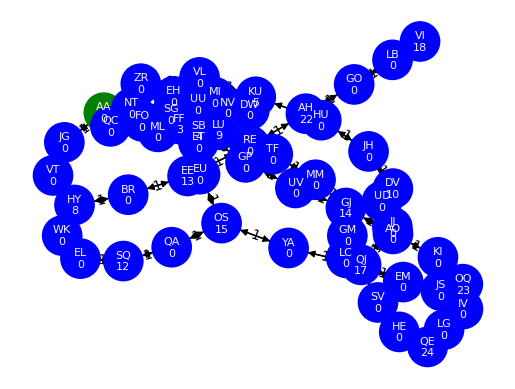

In [83]:
import networkx as nx

G = nx.DiGraph()

for valve, value in VALVES.items():
    G.add_node(valve, flow_rate = value["flow_rate"])
    for leads_to_valve in value["leads_to"]:
        G.add_edge(valve, leads_to_valve, weight=1)  # default edge data=1

pos = nx.spring_layout(G, seed=10)

node_labels = {valve: f"{valve}\n{data['flow_rate']}" for valve, data in VALVES.items()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color="whitesmoke", font_size=8)

nx.draw_networkx_edges(G, pos, alpha=0.5)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

color_map = ['green' if node == "AA" else 'blue' for node in G]        
nx.draw(G, pos=pos, font_color="whitesmoke", node_size=800, node_color=color_map)

In [84]:
# for each valve with a flow rate in the graph, find the shortest path to all other valves with flow rates
from collections import defaultdict


def bfs(graph, start_node, end_node):
    """ breadth first search - shortest path """

    visited = set()
    queue = [[start_node]]

    while queue:
        path = queue.pop(0)
        node = path[-1] 

        if node not in visited:
            for neighbour in graph[node]:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == end_node:
                    return new_path

            visited.add(node)

    return None

# graph = defaultdict(set)
graph = {valve: data["leads_to"] for valve, data in VALVES.items()}

VALVES_WITH_FLOW_RATES_PLUS_A = VALVES_WITH_FLOW_RATES.union(["AA"])

edges = []
for valve_a in VALVES_WITH_FLOW_RATES_PLUS_A:  # include A as that is the starting point
    for valve_b in VALVES_WITH_FLOW_RATES:
        if valve_a != valve_b:
            shortest_path = bfs(graph=graph, start_node=valve_a, end_node=valve_b)
            if shortest_path is not None:
                hops = len(shortest_path) - 1
                edges.append((valve_a, valve_b, hops))
            else:
                raise ValueError(f"no shortest path for {valve_a} {valve_b}")

# remember that you need to start at A (which is a 0 node)



In [85]:

VALVE_GRAPH = {}
for valve_from, valve_to, cost in edges:
    if valve_from not in VALVE_GRAPH:
        VALVE_GRAPH[valve_from] = []
    VALVE_GRAPH[valve_from].append((valve_to, cost))

VAVLE_GRAPH_VALVES = set(VALVE_GRAPH.keys())
print(VAVLE_GRAPH_VALVES)

for key, item in VALVE_GRAPH.items():
    print(key, item)

{'FF', 'EE', 'QJ', 'SB', 'KU', 'AH', 'HY', 'QE', 'SQ', 'VI', 'OQ', 'LU', 'OS', 'DV', 'GJ', 'AA'}
EE [('QJ', 9), ('SB', 7), ('KU', 8), ('AH', 2), ('HY', 2), ('QE', 12), ('SQ', 5), ('VI', 5), ('OQ', 12), ('LU', 8), ('OS', 7), ('DV', 11), ('GJ', 10), ('FF', 7)]
QJ [('EE', 9), ('SB', 6), ('KU', 5), ('AH', 11), ('HY', 7), ('QE', 3), ('SQ', 4), ('VI', 14), ('OQ', 3), ('LU', 6), ('OS', 2), ('DV', 2), ('GJ', 3), ('FF', 4)]
SB [('EE', 7), ('QJ', 6), ('KU', 2), ('AH', 9), ('HY', 5), ('QE', 9), ('SQ', 6), ('VI', 12), ('OQ', 6), ('LU', 2), ('OS', 4), ('DV', 5), ('GJ', 3), ('FF', 2)]
KU [('EE', 8), ('QJ', 5), ('SB', 2), ('AH', 10), ('HY', 6), ('QE', 8), ('SQ', 6), ('VI', 13), ('OQ', 8), ('LU', 2), ('OS', 4), ('DV', 3), ('GJ', 5), ('FF', 2)]
AH [('EE', 2), ('QJ', 11), ('SB', 9), ('KU', 10), ('HY', 4), ('QE', 14), ('SQ', 7), ('VI', 3), ('OQ', 14), ('LU', 10), ('OS', 9), ('DV', 13), ('GJ', 12), ('FF', 9)]
HY [('EE', 2), ('QJ', 7), ('SB', 5), ('KU', 6), ('AH', 4), ('QE', 10), ('SQ', 3), ('VI', 7), ('OQ

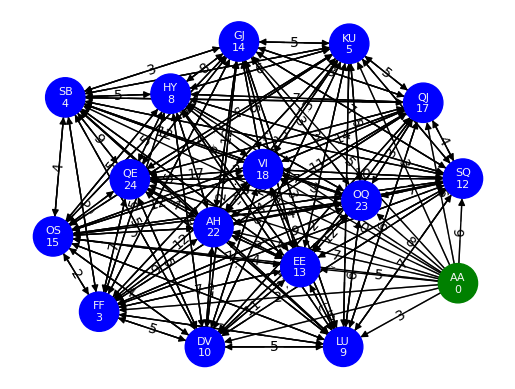

In [86]:
import networkx as nx

G = nx.DiGraph()

for valve_a, valve_b, hops in edges:
    G.add_edge(valve_a, valve_b, weight=hops)

pos = nx.spring_layout(G, seed=10)

node_labels = {valve: f"{valve}\n{data['flow_rate']}" for valve, data in VALVES.items() if valve in VALVES_WITH_FLOW_RATES_PLUS_A}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color="whitesmoke", font_size=8)

nx.draw_networkx_edges(G, pos, alpha=0.5)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

color_map = ['green' if node == "AA" else 'blue' for node in G]        
nx.draw(G, pos=pos, font_color="whitesmoke", node_size=800, node_color=color_map)

In [87]:
STARTING_VALVE = "AA"
TIME_TO_ERUPTION = 30

def blah_blah(visited: set, time_remaining: int, current_valve: str, total_pressure_release: int, path: list[str]):

    visited.add(current_valve)

    pressure_release = time_remaining * VALVES[current_valve]["flow_rate"]
    total_pressure_release += pressure_release

    if time_remaining <= 0 or visited == VAVLE_GRAPH_VALVES:
        yield path, total_pressure_release
        return

    for valve_to, cost in VALVE_GRAPH[current_valve]:
        if valve_to not in visited:
            new_path = path.copy()
            new_path.append(valve_to)
            yield from blah_blah(visited=visited.copy(), time_remaining=time_remaining - cost - 1, current_valve=valve_to, total_pressure_release=total_pressure_release, path=new_path)

x = blah_blah(visited=set(), time_remaining=TIME_TO_ERUPTION, current_valve=STARTING_VALVE, total_pressure_release=0, path=[STARTING_VALVE])

max_pressure_released = 0
best_path = None
for path, pressure_released in x:
    if pressure_released > max_pressure_released:
        max_pressure_released = pressure_released
        best_path = path
print(best_path, max_pressure_released)


['AA', 'OS', 'QJ', 'QE', 'OQ', 'GJ', 'DV', 'KU', 'SB'] 1728


In [ ]:
def does_final_pair_appear_more_than_once(l: list[str]) -> bool:
    length = len(l)
    if length < 4:
        return False

    # final_pair = l[-2:]

    # a, b = l[-2:]


    # final_pair = [l[-2], l[-1]]
    # everything_else = l[length-4:length-2]
    everything_else = l[:length-2]
    # everything_else = [l[-4], l[-3]]
    # if final_pair == everything_else:
    # everything_else = l[:len(l)-2]

    # if l[-2] == l[-4] and l[-1] == l[-3]:
    #     return True

    # if "".join([a, b + 'c']) in "".join(everything_else):
    #     return True

    # if "".join(final_pair) in "".join(everything_else):
    #     return True


    if f"{l[-2]}{l[-1]}c" in "".join(everything_else):
        return True

    return False


STARTING_VALVE = "AA"
TIME_TO_ERUPTION = 30 #30

def blah_blah(opened: set, time_remaining: int, current_valve: str, total_pressure_release: int, path: list[str], visited_since_last_open: set):

    # if current_valve in visited:
    #     return

    if current_valve in visited_since_last_open:
        return
    visited_since_last_open.add(current_valve)

    # print(current_valve, time_remaining, visited, total_pressure_release)

    # time remaining at this point has already had the -1 applied

    # if "HH" in opened:
    #     print("hello")

    # if VALVES_WITH_FLOW_RATES.issubset(opened):
    #     print(opened)


    if time_remaining <= 0:
        # yield opened
        yield path, total_pressure_release
        return

    elif VALVES_WITH_FLOW_RATES.issubset(opened):
        # print(opened)
        # yield opened
        yield path, total_pressure_release
        return

    # if flow rate is 0, opening will always be worse, so don't do it

    # xyz = "".join(path)

    for leads_to_valve in VALVES[current_valve]["leads_to"]:

        # if xyz == "AADDoCCBBoAAIIJJoIIAA":
        #     print("hello")

        # check final pair is not in path already
        # new_path = path + [leads_to_valve]
        new_path = path.copy()
        new_path[-1] = new_path[-1] + "c"
        new_path = new_path + [leads_to_valve]
        does_it = does_final_pair_appear_more_than_once(new_path)
        if not does_it:
            yield from blah_blah(opened=opened.copy(), time_remaining=time_remaining - 1, current_valve=leads_to_valve, total_pressure_release=total_pressure_release, path=new_path, visited_since_last_open=visited_since_last_open.copy())
        # else:
        #     yield path, total_pressure_release

        if current_valve not in opened and VALVES[current_valve]["flow_rate"] != 0:
            time_remaining_after_valve_opening = time_remaining - 1
            current_valve_pressure_release = time_remaining_after_valve_opening * VALVES[current_valve]["flow_rate"]
            total_pressure_release_after_opening = total_pressure_release + current_valve_pressure_release
            new_opened = opened.copy()
            new_opened.add(current_valve)
            new_path = path.copy()
            # new_path[-1] = new_path[-1][0] + "o"
            new_path[-1] = new_path[-1] + "o"
            new_path = new_path + [leads_to_valve]
            if not does_final_pair_appear_more_than_once(new_path):
                yield from blah_blah(opened=new_opened, time_remaining=time_remaining_after_valve_opening - 1, current_valve=leads_to_valve, total_pressure_release=total_pressure_release_after_opening, path=new_path, visited_since_last_open=set())
            # else: 
            #     yield path, total_pressure_release

    # it will take one minute to open a valve
    # it will take one minute to follow any tunnel from one valve to another

    pass

options = blah_blah(opened=set(), time_remaining=TIME_TO_ERUPTION, current_valve=STARTING_VALVE, total_pressure_release=0, path=[STARTING_VALVE], visited_since_last_open=set())

# options = list(options)

max_pressure_released = 0
best_path = None
for path, pressure_released in options:
    if pressure_released > max_pressure_released:
        max_pressure_released = pressure_released
        best_path = path
print(best_path, max_pressure_released)

# options.sort(key=len, reverse=True)

# print("options", len(options))

# len 196028
# len 196028

# for path, pressure_released in options:
    # print("".join(path[:14]), "".join(path[:14]) == "AADDoCCBBoAAIIJJoIIAADDEEFFGGHHo")
    # if "".join(path[:9]) == "AADDoCCBBoAAIIJJoIIAA":
    # # # if pressure_released > 1500:
    #     print(path, pressure_released)
    # break

In [1]:
# ['AAcc', 'DDo', 'AAc', 'BBo', 'AAc', 'IIc', 'JJo', 'IIc', 'AAc', 'DDc', 'EEc', 'FFc', 'GGc', 'HHo', 'GGc', 'FFc', 'EEo', 'DDc', 'CCo', 'DD'] 1651
# ['AAc', 'DDo', 'AAc', 'IIc', 'JJo', 'IIc', 'AAc', 'BBo', 'CCc', 'DDc', 'EEc', 'FFc', 'GGc', 'HHo', 'GGc', 'FFc', 'EEo', 'DDc', 'CCo', 'DD'] 1649



# for o in options:
#     if VALVES_WITH_FLOW_RATES.issubset(o):
#         print(o)

# print(len(options))
# for o in options:
#     print(o)